In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [3]:
df_wine.shape

(178, 14)

In [4]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardizing

In [9]:
sc = StandardScaler()

In [10]:
# scale the data
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.fit_transform(X_test)

# Covariance Matrix

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a d×d matrix where each element represents the covariance between two features. 

The covariance between two features is calculated as follows:

$$ \Large \sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{n}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right). $$

We can summarize the calculation of the covariance matrix via the following matrix equation: 

$$ \Large \Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$$

where $\Large \bar{x}$ is the mean vector $ \Large \mathbf{\bar{x}} = \frac{1}{n} \sum\limits_{i=1}^n x_{i}$ 

The mean vector is a d-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [11]:
# calculate the covariance matrix
cov_mat = np.cov(X_train_std.T)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00813008  0.08797701  0.23066952 -0.32868099  0.2141631   0.35576761
   0.2991246  -0.16913744  0.09649074  0.56962271 -0.04781543  0.07403492
   0.63277882]
 [ 0.08797701  1.00813008  0.2016416   0.30658143 -0.06030917 -0.30124242
  -0.41221162  0.36616593 -0.19190146  0.30749173 -0.54992807 -0.39352761
  -0.20253906]
 [ 0.23066952  0.2016416   1.00813008  0.44971971  0.18321413  0.12235533
   0.06130256  0.18655693 -0.02607834  0.24555355 -0.10928021 -0.01820002
   0.15948032]
 [-0.32868099  0.30658143  0.44971971  1.00813008 -0.08930998 -0.37018442
  -0.41804463  0.40212108 -0.25765667 -0.03090225 -0.25313262 -0.28934372
  -0.48504311]
 [ 0.2141631  -0.06030917  0.18321413 -0.08930998  1.00813008  0.16513295
   0.14458703 -0.30763563  0.27228619  0.1260674   0.05792599  0.01596134
   0.31461066]
 [ 0.35576761 -0.30124242  0.12235533 -0.37018442  0.16513295  1.00813008
   0.88119961 -0.45396901  0.6196806  -0.06935051  0.45718802  0.72214462
   0.56326772]
 [ 

OR

In [12]:
mean_vec = np.mean(X_train_std, axis=0)

cov_mat = (X_train_std - mean_vec).T.dot((X_train_std - mean_vec)) / (X_train_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00813008  0.08797701  0.23066952 -0.32868099  0.2141631   0.35576761
   0.2991246  -0.16913744  0.09649074  0.56962271 -0.04781543  0.07403492
   0.63277882]
 [ 0.08797701  1.00813008  0.2016416   0.30658143 -0.06030917 -0.30124242
  -0.41221162  0.36616593 -0.19190146  0.30749173 -0.54992807 -0.39352761
  -0.20253906]
 [ 0.23066952  0.2016416   1.00813008  0.44971971  0.18321413  0.12235533
   0.06130256  0.18655693 -0.02607834  0.24555355 -0.10928021 -0.01820002
   0.15948032]
 [-0.32868099  0.30658143  0.44971971  1.00813008 -0.08930998 -0.37018442
  -0.41804463  0.40212108 -0.25765667 -0.03090225 -0.25313262 -0.28934372
  -0.48504311]
 [ 0.2141631  -0.06030917  0.18321413 -0.08930998  1.00813008  0.16513295
   0.14458703 -0.30763563  0.27228619  0.1260674   0.05792599  0.01596134
   0.31461066]
 [ 0.35576761 -0.30124242  0.12235533 -0.37018442  0.16513295  1.00813008
   0.88119961 -0.45396901  0.6196806  -0.06935051  0.45718802  0.72214462
   0.56326772]
 [ 

# eigendecomposition

the eigenvector-eigenvalue calculation is 
$$ \Large \pmb\Sigma\pmb{v} = \lambda\pmb{v} $$

$$ \pmb\Sigma = Covariance \; matrix\\
\pmb{v} = \; Eigenvector\\
\lambda = \; Eigenvalue $$

In [13]:
# performe the eigendecomposition
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


** Summary so far ... **

1. Using the numpy.cov function, we computed the covariance matrix of the standardized training dataset. 

2. Using the linalg.eig function, we performed the eigendecomposition that yielded a vector (eigen_vals) consisting of 13 eigenvalues and the corresponding eigenvectors stored as columns in a 13×13 -dimensional matrix (eigen_vecs).

Next ...

Since we want to reduce the dimensionality of our dataset by compressing it onto a new feature subspace, we only select the __subset of the eigenvectors (principal components)__ that contains most of the information (variance).  

Since the eigenvalues define the magnitude of the eigenvectors, we have to sort the eigenvalues by decreasing magnitude; we are interested in the top k eigenvectors based on the values of their corresponding eigenvalues. But before we collect those k most informative eigenvectors, let's plot the variance explained ratios of the eigenvalues.

The __variance explained ratio__ of an eigenvalue $\lambda_j$
is simply the fraction of an eigenvalue $\lambda_j$ and the total sum of the eigenvalues:

In [14]:
tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

In [15]:
cum_var_exp

array([0.37329648, 0.56148574, 0.67045365, 0.74769754, 0.81248349,
       0.85840362, 0.89827298, 0.92349212, 0.94607393, 0.96438317,
       0.98073654, 0.99357924, 1.        ])

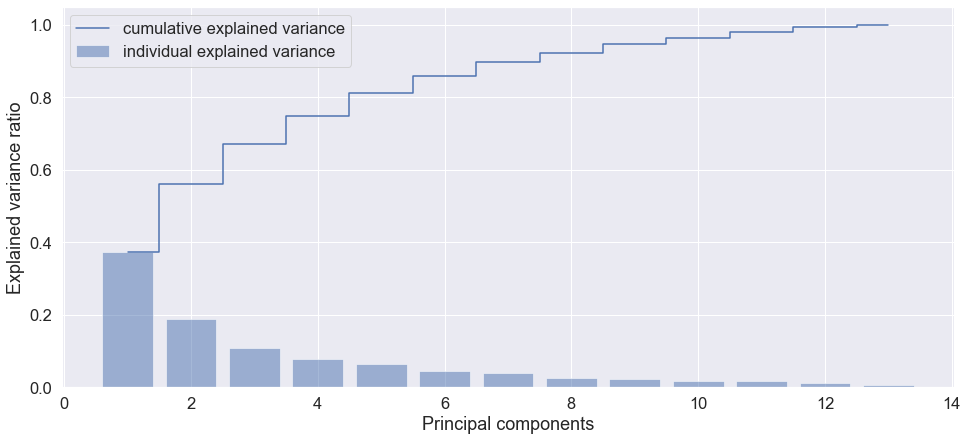

In [15]:
plt.figure(figsize=(16, 7))

plt.bar(range(1,14),  var_exp,     alpha=0.5,   align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best');

** Summary **

The resulting plot indicates that the first principal component alone accounts for 40 percent of the variance. 

Also, we can see that the first 2 principal components combined explain almost 60 percent of the variance in the data:

> the explained variance plot reminds us of the feature importance!!!

# Feature transformation

After we have successfully decomposed the covariance matrix into eigenpairs, let's now proceed with the last 3 steps to transform the Wine dataset onto the new principal component axes.

remaining 3 steps ...

1. sort the eigenpairs - by descending order of the eigenvalues 
2. construct a projection matrix from the selected eigenvectors 
3. use the projection matrix to transform the data onto the lower-dimensional subspace.

In [16]:
eigen_vals

array([4.8923083 , 2.46635032, 1.42809973, 1.01233462, 0.84906459,
       0.60181514, 0.52251546, 0.08414846, 0.33051429, 0.29595018,
       0.16831254, 0.21432212, 0.2399553 ])

In [17]:
eigen_vecs

array([[ 1.46698114e-01,  5.04170789e-01, -1.17235150e-01,
         2.06254611e-01, -1.87815947e-01, -1.48851318e-01,
        -1.79263662e-01, -5.54687162e-02, -4.03054922e-01,
        -4.17197583e-01,  2.75660860e-01,  4.03567189e-01,
         4.13320786e-04],
       [-2.42245536e-01,  2.42168894e-01,  1.49946576e-01,
         1.30489298e-01,  5.68639776e-01, -2.69052764e-01,
        -5.92636731e-01,  3.32731614e-02, -1.01833706e-01,
         2.17101488e-01, -8.13845005e-02, -1.52474999e-01,
        -8.78560762e-02],
       [-2.99344215e-02,  2.86984836e-01,  6.56394387e-01,
         1.51536318e-02, -2.99209426e-01, -9.33386061e-02,
         6.07334578e-02, -1.00618575e-01,  3.51841423e-01,
         1.28549846e-01, -1.29751275e-02,  1.68376064e-01,
        -4.52518598e-01],
       [-2.55190023e-01, -6.46871827e-02,  5.84282337e-01,
        -9.04220851e-02, -4.12499478e-02, -1.01342392e-01,
         2.50323869e-01,  5.61658566e-02, -5.00457282e-01,
         4.73344124e-02,  9.89088030e

In [18]:
eigen_vecs[:, 0]

array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
        0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
        0.30032535,  0.36821154,  0.29259713])

In [19]:
# sorting the eigenpairs by decreasing order of the eigenvalues
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(reverse=True)

Next, we collect the 2 eigenvectors that correspond to the 2 largest values to
capture about 60 percent of the variance in this dataset. 

Note that we only chose two
eigenvectors for the purpose of illustration, since we are going to plot the data via
a two-dimensional scatter plot later

In [20]:
eigen_pairs

[(4.892308303273746,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592284,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048444,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044966,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.8490645933450254,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543,

In [21]:
eigen_pairs[0][1]

array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
        0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
        0.30032535,  0.36821154,  0.29259713])

In [22]:
eigen_pairs[1][1]

array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
        0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
       -0.27924322, -0.174365  ,  0.36315461])

In [23]:
eigen_pairs[0][1][:, np.newaxis]

array([[ 0.14669811],
       [-0.24224554],
       [-0.02993442],
       [-0.25519002],
       [ 0.12079772],
       [ 0.38934455],
       [ 0.42326486],
       [-0.30634956],
       [ 0.30572219],
       [-0.09869191],
       [ 0.30032535],
       [ 0.36821154],
       [ 0.29259713]])

In [22]:
eigen_pairs[1][1][:, np.newaxis]

array([[ 0.50417079],
       [ 0.24216889],
       [ 0.28698484],
       [-0.06468718],
       [ 0.22995385],
       [ 0.09363991],
       [ 0.01088622],
       [ 0.01870216],
       [ 0.03040352],
       [ 0.54527081],
       [-0.27924322],
       [-0.174365  ],
       [ 0.36315461]])

In [24]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n',w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


we have created a 13 × 2 - dimensional projection matrix W from the top 2 eigenvectors. 

Using the projection matrix, we can now transform a sample x (represented as 1×13-dimensional row vector) onto the PCA subspace obtaining $x^{\prime}$ , a now two-dimensional sample vector consisting of two new features: $x^{\prime}$ = xW

In [27]:
X_train_std[0]

array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

In [27]:
X_train_std[0].dot(w)

array([2.59891628, 0.00484089])

Similarly, we can transform the entire 124×13-dimensional training dataset onto the
two principal components by calculating the matrix dot product:

$$ \Large x^{\prime} = xW $$

In [28]:
X_train_pca = X_train_std.dot(w)

let's visualize the transformed Wine training set, now stored as an 124× 2 -dimensional matrix, in a two-dimensional scatterplot:

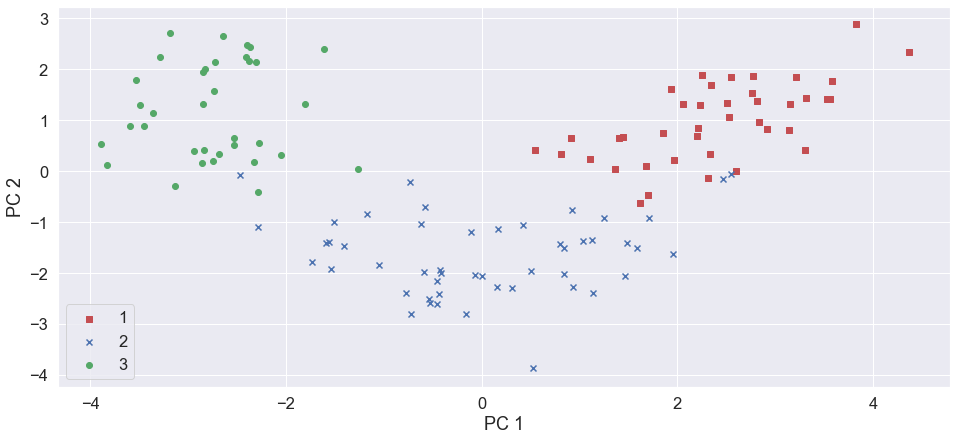

In [29]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

plt.figure(figsize=(16, 7))

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
    X_train_pca[y_train==l, 1],
    c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.legend(loc='lower left');

As we can see in the resulting plot, the data is more spread along the x-axis—the first principal component—than the second principal component (y-axis), which is consistent with the explained variance ratio plot that we created in the previous subsection. 

we can intuitively see that a linear classifier will likely be able to separate the classes well!!

# Homework

1. Add the 3 PC 
2. Modify the scatter plot, for 3D